# AI Enabled Fintech B2B Invoice Management Application



### Name - Soubhik Roy
### Internship ID - H2HBABBA3160

### Objective - To build a Machine Learning Model to predict the payment date of an invoice when it gets created in the system.

Steps to perform -

1. Understanding the problem
2. Data Reading
3. Removing the datapoints where the target value is null
4. Preprocess the data
5. Train, Validation and Test split
6. EDA (Exploratory Data Analysis)
7. Feature Engineering
8. Feature Selection
9. Modelling

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file
df = pd.read_csv('H2HBABBA3160.csv')

In [3]:
# Print the first 5 elements of the dataset
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200706844,WINC corporation,2019-06-07 00:00:00,2019.0,1.929069e+09,2019-04-03,20190402,20190403,20190607.0,USD,RV,1.0,NaN,4303.72,20190403.0,NAGD,1.929069e+09,0
1,U001,0200762301,C&S WH,2019-07-16 00:00:00,2019.0,1.929557e+09,2019-07-01,20190629,20190701,20190716.0,USD,RV,1.0,NaN,13146.91,20190701.0,NAC6,1.929557e+09,0
2,U001,0200769623,WAL-MAR associates,2019-03-28 00:00:00,2019.0,1.928981e+09,2019-03-18,20190317,20190318,20190402.0,USD,RV,1.0,NaN,551.16,20190318.0,NAH4,1.928981e+09,0
3,CA02,0140106408,WAL-M corp,2019-12-30 00:00:00,2019.0,2.960602e+09,2019-12-19,20191219,20191219,20191229.0,CAD,RV,1.0,NaN,843.50,20191219.0,CA10,2.960602e+09,0
4,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930686e+09,2020-03-24,20200322,20200324,20200408.0,USD,RV,1.0,NaN,47959.38,20200324.0,NAH4,1.930686e+09,1


In [4]:
#Print the last 5 elements of the dataset
df.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,0200726979,BJ'S,2019-04-04 00:00:00,2019.0,1.928992e+09,2019-03-20,20190319,20190320,20190404.0,USD,RV,1.0,NaN,598.19,20190320.0,NAA8,1.928992e+09,0
49996,U001,0200772670,ASSOCIAT llc,NaN,2020.0,1.930694e+09,2020-03-24,20200325,20200324,20200408.0,USD,RV,1.0,NaN,31572.48,20200324.0,NAU5,1.930694e+09,1
49997,U001,200794332,COST trust,2019-04-15 00:00:00,2019.0,1.929017e+09,2019-03-26,20190323,20190326,20190410.0,USD,RV,1.0,NaN,15284.38,20190326.0,NAAX,1.929017e+09,0
49998,U001,0200762301,C&S WH foundation,NaN,2020.0,1.930763e+09,2020-04-08,20200408,20200408,20200423.0,USD,RV,1.0,NaN,146340.43,20200408.0,NAC6,1.930763e+09,1
49999,U001,0200769623,WAL-MAR associates,2020-02-10 00:00:00,2020.0,1.930449e+09,2020-01-29,20200128,20200129,20200213.0,USD,RV,1.0,NaN,40155.06,20200129.0,NAH4,1.930449e+09,0


In [5]:
# Printing the complete dataset
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200706844,WINC corporation,2019-06-07 00:00:00,2019.0,1.929069e+09,2019-04-03,20190402,20190403,20190607.0,USD,RV,1.0,NaN,4303.72,20190403.0,NAGD,1.929069e+09,0
1,U001,0200762301,C&S WH,2019-07-16 00:00:00,2019.0,1.929557e+09,2019-07-01,20190629,20190701,20190716.0,USD,RV,1.0,NaN,13146.91,20190701.0,NAC6,1.929557e+09,0
2,U001,0200769623,WAL-MAR associates,2019-03-28 00:00:00,2019.0,1.928981e+09,2019-03-18,20190317,20190318,20190402.0,USD,RV,1.0,NaN,551.16,20190318.0,NAH4,1.928981e+09,0
3,CA02,0140106408,WAL-M corp,2019-12-30 00:00:00,2019.0,2.960602e+09,2019-12-19,20191219,20191219,20191229.0,CAD,RV,1.0,NaN,843.50,20191219.0,CA10,2.960602e+09,0
4,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930686e+09,2020-03-24,20200322,20200324,20200408.0,USD,RV,1.0,NaN,47959.38,20200324.0,NAH4,1.930686e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200726979,BJ'S,2019-04-04 00:00:00,2019.0,1.928992e+09,2019-03-20,20190319,20190320,20190404.0,USD,RV,1.0,NaN,598.19,20190320.0,NAA8,1.928992e+09,0
49996,U001,0200772670,ASSOCIAT llc,NaN,2020.0,1.930694e+09,2020-03-24,20200325,20200324,20200408.0,USD,RV,1.0,NaN,31572.48,20200324.0,NAU5,1.930694e+09,1
49997,U001,200794332,COST trust,2019-04-15 00:00:00,2019.0,1.929017e+09,2019-03-26,20190323,20190326,20190410.0,USD,RV,1.0,NaN,15284.38,20190326.0,NAAX,1.929017e+09,0
49998,U001,0200762301,C&S WH foundation,NaN,2020.0,1.930763e+09,2020-04-08,20200408,20200408,20200423.0,USD,RV,1.0,NaN,146340.43,20200408.0,NAC6,1.930763e+09,1


In [6]:
# Printing the dimensions of the dataset
df.shape

(50000, 19)

In [7]:
# Prints the datatypes of each column of the dataset
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [8]:
#Check the correlation between 2 columns document_create_date and document_create_date.1

df[['document_create_date','document_create_date.1']].corr()

,document_create_date,document_create_date.1
document_create_date,1.000000,0.993494
document_create_date.1,0.993494,1.000000


In [9]:
#We are dropping the document_create_date.1 column because it has maximum similarities with document_create_date column (>0.95)

df.drop(['document_create_date.1'], axis=1, inplace=True)

In [10]:
#Prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         50000 non-null  object 
 1   cust_number           50000 non-null  object 
 2   name_customer         50000 non-null  object 
 3   clear_date            40000 non-null  object 
 4   buisness_year         50000 non-null  float64
 5   doc_id                50000 non-null  float64
 6   posting_date          50000 non-null  object 
 7   document_create_date  50000 non-null  int64  
 8   due_in_date           50000 non-null  float64
 9   invoice_currency      50000 non-null  object 
 10  document type         50000 non-null  object 
 11  posting_id            50000 non-null  float64
 12  area_business         0 non-null      float64
 13  total_open_amount     50000 non-null  float64
 14  baseline_create_date  50000 non-null  float64
 15  cust_payment_terms 

In [11]:
# This will give number of NaN values in every column.

df.isna().sum()

business_code               0
cust_number                 0
name_customer               0
clear_date              10000
buisness_year               0
doc_id                      0
posting_date                0
document_create_date        0
due_in_date                 0
invoice_currency            0
document type               0
posting_id                  0
area_business           50000
total_open_amount           0
baseline_create_date        0
cust_payment_terms          0
invoice_id                  5
isOpen                      0
dtype: int64

In [12]:
#From the above sum we can see 'area_business' is totally useless as it has null values for all 50000 data rows.

df.drop(['area_business'], axis=1, inplace=True)

In [13]:
#Prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         50000 non-null  object 
 1   cust_number           50000 non-null  object 
 2   name_customer         50000 non-null  object 
 3   clear_date            40000 non-null  object 
 4   buisness_year         50000 non-null  float64
 5   doc_id                50000 non-null  float64
 6   posting_date          50000 non-null  object 
 7   document_create_date  50000 non-null  int64  
 8   due_in_date           50000 non-null  float64
 9   invoice_currency      50000 non-null  object 
 10  document type         50000 non-null  object 
 11  posting_id            50000 non-null  float64
 12  total_open_amount     50000 non-null  float64
 13  baseline_create_date  50000 non-null  float64
 14  cust_payment_terms    50000 non-null  object 
 15  invoice_id         

In [14]:
#Converting column clear_date, due_in_date and baseline_create_date into datetime64[ns]

df['clear_date'] = pd.to_datetime(df['clear_date'])
df['due_in_date']=pd.to_datetime(df['due_in_date'], format = '%Y%m%d').astype(str)
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'], format = '%Y%m%d').astype(str)

In [15]:
#Prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         50000 non-null  object        
 1   cust_number           50000 non-null  object        
 2   name_customer         50000 non-null  object        
 3   clear_date            40000 non-null  datetime64[ns]
 4   buisness_year         50000 non-null  float64       
 5   doc_id                50000 non-null  float64       
 6   posting_date          50000 non-null  object        
 7   document_create_date  50000 non-null  int64         
 8   due_in_date           50000 non-null  object        
 9   invoice_currency      50000 non-null  object        
 10  document type         50000 non-null  object        
 11  posting_id            50000 non-null  float64       
 12  total_open_amount     50000 non-null  float64       
 13  baseline_create_

In [16]:
#Converting column document_create_date, due_in_date and baseline_create_date into datetime64[ns]

df['due_in_date']=pd.to_datetime(df['due_in_date'])
df['document_create_date']=pd.to_datetime(df['document_create_date'],format ='%Y%m%d')
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'])

In [17]:
##Prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         50000 non-null  object        
 1   cust_number           50000 non-null  object        
 2   name_customer         50000 non-null  object        
 3   clear_date            40000 non-null  datetime64[ns]
 4   buisness_year         50000 non-null  float64       
 5   doc_id                50000 non-null  float64       
 6   posting_date          50000 non-null  object        
 7   document_create_date  50000 non-null  datetime64[ns]
 8   due_in_date           50000 non-null  datetime64[ns]
 9   invoice_currency      50000 non-null  object        
 10  document type         50000 non-null  object        
 11  posting_id            50000 non-null  float64       
 12  total_open_amount     50000 non-null  float64       
 13  baseline_create_

# Identifying and making the Target column

### We are creating a new column name :- Target, which gives the delay time ( due_in_date - clear_date )

#### Therefore, Target is our Target Column 

In [18]:
#Target = (due_in_date - clear_date) and output will be in number of days. 

df['Target'] = (df['due_in_date'] - df['clear_date']).dt.days

In [19]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
0,U001,0200706844,WINC corporation,2019-06-07,2019.0,1.929069e+09,2019-04-03,2019-04-02,2019-06-07,USD,RV,1.0,4303.72,2019-04-03,NAGD,1.929069e+09,0,0.0
1,U001,0200762301,C&S WH,2019-07-16,2019.0,1.929557e+09,2019-07-01,2019-06-29,2019-07-16,USD,RV,1.0,13146.91,2019-07-01,NAC6,1.929557e+09,0,0.0
2,U001,0200769623,WAL-MAR associates,2019-03-28,2019.0,1.928981e+09,2019-03-18,2019-03-17,2019-04-02,USD,RV,1.0,551.16,2019-03-18,NAH4,1.928981e+09,0,5.0
3,CA02,0140106408,WAL-M corp,2019-12-30,2019.0,2.960602e+09,2019-12-19,2019-12-19,2019-12-29,CAD,RV,1.0,843.50,2019-12-19,CA10,2.960602e+09,0,-1.0
4,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930686e+09,2020-03-24,2020-03-22,2020-04-08,USD,RV,1.0,47959.38,2020-03-24,NAH4,1.930686e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200726979,BJ'S,2019-04-04,2019.0,1.928992e+09,2019-03-20,2019-03-19,2019-04-04,USD,RV,1.0,598.19,2019-03-20,NAA8,1.928992e+09,0,0.0
49996,U001,0200772670,ASSOCIAT llc,NaT,2020.0,1.930694e+09,2020-03-24,2020-03-25,2020-04-08,USD,RV,1.0,31572.48,2020-03-24,NAU5,1.930694e+09,1,NaN
49997,U001,200794332,COST trust,2019-04-15,2019.0,1.929017e+09,2019-03-26,2019-03-23,2019-04-10,USD,RV,1.0,15284.38,2019-03-26,NAAX,1.929017e+09,0,-5.0
49998,U001,0200762301,C&S WH foundation,NaT,2020.0,1.930763e+09,2020-04-08,2020-04-08,2020-04-23,USD,RV,1.0,146340.43,2020-04-08,NAC6,1.930763e+09,1,NaN


# Removing the datapoints 

## Splitting the datasets into 'main_train' and 'main_test' on the basis of 'clear_date' being null and not null

### Note :- We could have also splitted on the basis of 'Target' column 

In [20]:
#main_train for clear_date not null

main_train = df[df.clear_date.isnull()==False]

#main_test for clear_date null

main_test = df[df.clear_date.isnull()]

In [21]:
#Getting the dimensions of the main_train and main_test datasets.

main_train.shape, main_test.shape

((40000, 18), (10000, 18))

In [22]:
#Printing number of NaN values in each column

main_train.isna().sum()

business_code           0
cust_number             0
name_customer           0
clear_date              0
buisness_year           0
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
invoice_currency        0
document type           0
posting_id              0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
invoice_id              5
isOpen                  0
Target                  0
dtype: int64

In [23]:
# Checking for Correlation =>
# Printing the pairwise correlation of all columns in the dataframe. Any NaN values are automatically excluded. 
# For any non-numeric data type columns in the dataframe it is ignored.
# Note :- If there is High correlation between any two columns (except target column) then any one of it can be removed.
# But if there is High correlation between any column and Target column then we should keep that column for future references.

main_train.corr()

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen,Target
buisness_year,1.000000,-0.011572,NaN,-0.012091,-0.010782,NaN,0.006911
doc_id,-0.011572,1.000000,NaN,0.167224,1.000000,NaN,-0.159731
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,-0.012091,0.167224,NaN,1.000000,0.177101,NaN,-0.005763
invoice_id,-0.010782,1.000000,NaN,0.177101,1.000000,NaN,-0.138124
isOpen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Target,0.006911,-0.159731,NaN,-0.005763,-0.138124,NaN,1.000000


In [24]:
# Checking for Covariance =>
# To compute pairwise covariance of columns.
# If some of the cells in a column contain NaN value, then it is ignored.

main_train.cov()

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen,Target
buisness_year,1.133802e-01,-1.133300e+06,0.0,-1.602655e+02,-1.011401e+06,0.0,2.580910e-02
doc_id,-1.133300e+06,8.459647e+16,0.0,1.914601e+12,7.759901e+16,0.0,-5.152254e+08
posting_id,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
total_open_amount,-1.602655e+02,1.914601e+12,0.0,1.549552e+09,1.942064e+12,0.0,-2.515975e+03
invoice_id,-1.011401e+06,7.759901e+16,0.0,1.942064e+12,7.759901e+16,0.0,-4.229792e+08
isOpen,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
Target,2.580910e-02,-5.152254e+08,0.0,-2.515975e+03,-4.229792e+08,0.0,1.229890e+02


# Preprocess the data

### Null Imputation

In [25]:
# In the above null sum we noticed that invoice_id has 5 null values in it
# So, printing all the values having null invoice_id

main_train[main_train.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
3240,CA02,0100030194,AMAZO foundation,2019-12-27,2019.0,9.500000e+09,2019-03-29,2019-03-29,2019-03-30,CAD,X2,1.0,1326.0,2019-03-20,CA10,NaN,0,-272.0
6175,CA02,0100054351,UNF corp,2019-05-02,2019.0,9.500000e+09,2019-03-29,2019-03-29,2019-03-24,CAD,X2,1.0,5964.0,2019-03-14,CA10,NaN,0,-39.0
7077,CA02,0140104409,LOB trust,2019-05-22,2019.0,9.500000e+09,2019-03-29,2019-03-29,2019-03-24,CAD,X2,1.0,542.0,2019-03-14,CA10,NaN,0,-59.0
19437,CA02,0100030194,AMAZO in,2019-05-23,2019.0,9.500000e+09,2019-03-29,2019-03-29,2019-03-18,CAD,X2,1.0,2205.7,2019-03-08,CA10,NaN,0,-66.0
27989,CA02,0140104429,COSTCO systems,2019-05-02,2019.0,9.500000e+09,2019-03-29,2019-03-29,2019-03-01,CAD,X2,1.0,5353.2,2019-02-19,CA10,NaN,0,-62.0


In [26]:
# Dropping the record contating null value as the invoice_id is MCAR
# MCAR (Missing completely at random) => Data missing completely at random means that the probability of missingness in one independent variable does not depend on the other observed independent variables.

main_train = main_train[main_train.invoice_id.isnull()==False]

In [27]:
main_train.isna().sum()

business_code           0
cust_number             0
name_customer           0
clear_date              0
buisness_year           0
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
invoice_currency        0
document type           0
posting_id              0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
invoice_id              0
isOpen                  0
Target                  0
dtype: int64

### Constant / Duplicate removal

In [28]:
# Finding the correlation between doc_id and invoice_id
# To find out whether two columns have similar data or not.

main_train[['doc_id','invoice_id']].corr()

,doc_id,invoice_id
doc_id,1.0,1.0
invoice_id,1.0,1.0


In [29]:
# Since, two columns doc_id and invoice_id have similar data, so we droped invoice_id 

In [30]:
main_train.drop(['invoice_id'], axis=1, inplace=True)

In [31]:
# Prints information about a main_train dataframe including the index dtype and columns, non-null values and memory usage.

main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39995 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39995 non-null  object        
 1   cust_number           39995 non-null  object        
 2   name_customer         39995 non-null  object        
 3   clear_date            39995 non-null  datetime64[ns]
 4   buisness_year         39995 non-null  float64       
 5   doc_id                39995 non-null  float64       
 6   posting_date          39995 non-null  object        
 7   document_create_date  39995 non-null  datetime64[ns]
 8   due_in_date           39995 non-null  datetime64[ns]
 9   invoice_currency      39995 non-null  object        
 10  document type         39995 non-null  object        
 11  posting_id            39995 non-null  float64       
 12  total_open_amount     39995 non-null  float64       
 13  baseline_create_

In [32]:
# For catagorical columns with relatively low unique value (<= 12) looking for value_counts
# if unique count = 1 , constant column 

main_train.nunique()

business_code               6
cust_number              1328
name_customer            3838
clear_date                393
buisness_year               2
doc_id                  39139
posting_date              423
document_create_date      429
due_in_date               492
invoice_currency            2
document type               1
posting_id                  1
total_open_amount       35642
baseline_create_date      429
cust_payment_terms         70
isOpen                      1
Target                    176
dtype: int64

In [33]:
# From the above unique count, we infere that columns document_type, posting_id, and isOpen are constant (unique count = 1).

### Finding the number of counts of each particular element in a column. 

In [34]:
print(dict(main_train['business_code'].value_counts()))
print(dict(main_test['business_code'].value_counts()))

{'U001': 36150, 'CA02': 3176, 'U013': 520, 'U002': 140, 'U005': 7, 'U007': 2}
{'U001': 9154, 'CA02': 753, 'U013': 66, 'U002': 22, 'U005': 5}


In [35]:
print(dict(main_train['invoice_currency'].value_counts()))
print(dict(main_test['invoice_currency'].value_counts()))

{'USD': 36818, 'CAD': 3177}
{'USD': 9247, 'CAD': 753}


In [36]:
print(dict(main_train['isOpen'].value_counts()))
print(dict(main_test['isOpen'].value_counts()))

{0: 39995}
{1: 10000}


In [37]:
print(dict(main_train['document type'].value_counts()))
print(dict(main_test['document type'].value_counts()))

{'RV': 39995}
{'RV': 10000}


In [38]:
print(dict(main_train['posting_id'].value_counts()))
print(dict(main_test['posting_id'].value_counts()))

{1.0: 39995}
{1.0: 10000}


In [39]:
print(dict(main_train['cust_payment_terms'].value_counts()))
print(dict(main_test['cust_payment_terms'].value_counts()))

{'NAA8': 15847, 'NAH4': 10730, 'CA10': 3072, 'NAC6': 1392, 'NAM4': 1070, 'NAAX': 982, 'NAG2': 778, 'NAD1': 752, 'NAU5': 748, 'NAGD': 626, 'NA32': 606, 'NAX2': 561, 'NAM2': 454, 'NA10': 358, 'NAD5': 278, 'NAVF': 221, 'NAVE': 214, 'NAM1': 207, 'NAAW': 184, 'NAWU': 130, 'NAWN': 91, 'NAVQ': 87, 'NAVR': 80, 'NAWP': 67, 'NAUZ': 51, 'NA3B': 45, 'CA30': 36, 'NA38': 35, 'NACB': 31, 'NAVM': 30, 'NABG': 24, 'NAB1': 22, 'C106': 17, 'NAD4': 16, 'NAVD': 14, 'NA9X': 14, 'NAVL': 13, 'NA84': 10, 'NA3F': 10, 'BR56': 9, 'NAUP': 8, 'CAB1': 6, 'NA31': 5, 'NA8Q': 5, 'NAD8': 4, 'BR12': 4, 'NAM3': 4, 'NAWM': 4, 'B112': 3, 'NATU': 3, 'NAVC': 3, 'CAX2': 3, 'NATM': 3, 'NAUW': 2, 'NATH': 2, 'CA60': 2, 'NAUI': 2, 'NATV': 2, 'NATX': 2, 'NA25': 2, 'NANC': 2, 'NATK': 2, 'NATL': 2, 'B052': 2, 'NAUX': 1, 'NAUN': 1, 'NAV9': 1, 'NACE': 1, '90M7': 1, 'NATJ': 1}
{'NAA8': 4049, 'NAH4': 3042, 'CA10': 739, 'NAC6': 421, 'NAGD': 289, 'NAM4': 266, 'NAAX': 237, 'NAU5': 203, 'NAM2': 120, 'NAD1': 102, 'NAG2': 76, 'NA32': 76, 'NAX2'

# Splitting data 

## Splitting the main_train data into train, validation and test

In [40]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X => Contains the dataframe without the target column i.e Target

X = main_train.drop('Target',axis=1)

# y => Contains only the Target value 

y = main_train['Target']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# Splitting the data first into two parts => doing a 70:30 split i.e 30% data fed to intermediate test data set

X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [43]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [44]:
# Finding the dimensions of X_train, X_val, X_test data

X_train.shape , X_val.shape , X_test.shape

((27996, 16), (5999, 16), (6000, 16))

# EDA (Exploratory Data Analysis)

### We will be doing all the steps in the X_train data itself

<AxesSubplot:xlabel='Target', ylabel='Density'>

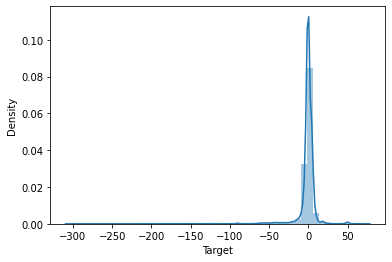

In [45]:
sns.distplot(y_train)

Inference from the above graph - 

1. Left skewed distribution
2. Outliers present but not that significant

In [46]:
A = X_train.merge(y_train,on = X_train.index)

In [47]:
A

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,Target
0,0,U001,0200706844,WINC corporation,2019-06-07,2019.0,1.929069e+09,2019-04-03,2019-04-02,2019-06-07,USD,RV,1.0,4303.72,2019-04-03,NAGD,0,0.0
1,1,U001,0200762301,C&S WH,2019-07-16,2019.0,1.929557e+09,2019-07-01,2019-06-29,2019-07-16,USD,RV,1.0,13146.91,2019-07-01,NAC6,0,0.0
2,2,U001,0200769623,WAL-MAR associates,2019-03-28,2019.0,1.928981e+09,2019-03-18,2019-03-17,2019-04-02,USD,RV,1.0,551.16,2019-03-18,NAH4,0,5.0
3,3,CA02,0140106408,WAL-M corp,2019-12-30,2019.0,2.960602e+09,2019-12-19,2019-12-19,2019-12-29,CAD,RV,1.0,843.50,2019-12-19,CA10,0,-1.0
4,5,U001,0200769623,WAL-MAR in,2019-09-04,2019.0,1.929775e+09,2019-08-23,2019-08-22,2019-09-07,USD,RV,1.0,3702.21,2019-08-23,NAH4,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27991,35036,U001,0200769623,WAL-MAR us,2019-10-01,2019.0,1.929896e+09,2019-09-20,2019-09-19,2019-10-05,USD,RV,1.0,11571.73,2019-09-20,NAH4,0,4.0
27992,35037,U001,0200778870,C systems,2019-07-23,2019.0,1.929494e+09,2019-06-17,2019-06-15,2019-07-02,USD,RV,1.0,43632.34,2019-06-17,NAA8,0,-21.0
27993,35038,U001,0200020431,DEC co,2019-10-01,2019.0,1.929907e+09,2019-09-21,2019-09-21,2019-10-09,USD,RV,1.0,1658.69,2019-09-16,NAM4,0,8.0
27994,35039,U001,0200735528,ASSOCIA systems,2019-08-02,2019.0,1.929621e+09,2019-07-17,2019-07-15,2019-08-01,USD,RV,1.0,24978.21,2019-07-17,NAA8,0,-1.0


<AxesSubplot:xlabel='invoice_currency', ylabel='Target'>

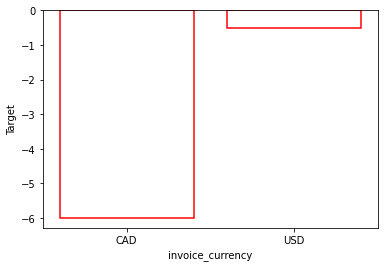

In [48]:
temp1 = pd.DataFrame(A.groupby(['invoice_currency'], axis=0, as_index=False)['Target'].mean())
plt.figure(figsize=(6,4))
sns.barplot(x="invoice_currency", y="Target",data=temp1,linewidth=1.5, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor="red")

Inference from the above graph - This shows USD currency deliveries have no delays in payment as such.

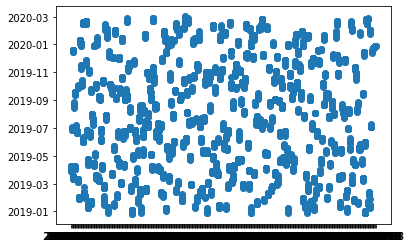

In [49]:
plt.plot_date(X_train['posting_date'], X_train['document_create_date'])
plt.show()

Inference from the above graph -

1. Posting_date and document_create_date gives a linear (straight) line graph.
2. Because it is giving a straight line graph we can drop any one column because they have similar values.

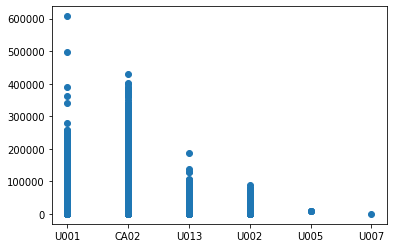

In [50]:
plt.scatter(X_train.business_code, X_train.total_open_amount)

Inference from the above graph -
1. We can see some Outliers in the graph.
2. We can drop those values with Outliers because Outliers in input data can skew and mislead the training process of machine learning algorithms resulting in longer training times, less accurate models and ultimately poorer results.

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

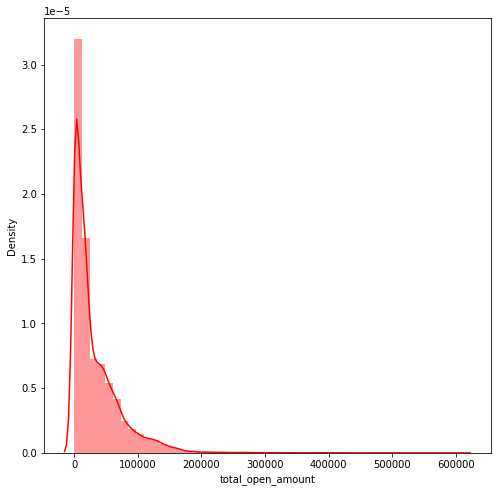

In [51]:
plt.figure(figsize=(8,8))
plt.figure(1)
sns.distplot(X_train['total_open_amount'],color='red')

Inference from the above graph -

The graph shows the 'total_open_amount' column is totally right skewed which puts strain on the bias of this data.

<AxesSubplot:xlabel='Target', ylabel='Density'>

<Figure size 432x432 with 0 Axes>

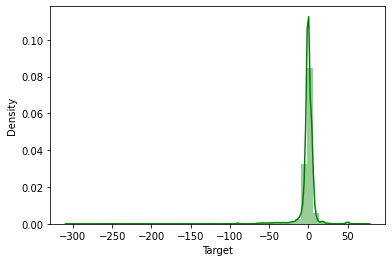

In [52]:
plt.figure(figsize=(6,6))
plt.figure(2)
sns.distplot(A['Target'],color='green')

Infernce from above the graph -

1. Left Skewed Distribution
2. Since it's not symmetric that means it is not completely normalized.
3. We have to normalize it because some feature values differ from others multiple times and the features with higher values will   dominate the learning process.

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27996 entries, 0 to 35040
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27996 non-null  object        
 1   cust_number           27996 non-null  object        
 2   name_customer         27996 non-null  object        
 3   clear_date            27996 non-null  datetime64[ns]
 4   buisness_year         27996 non-null  float64       
 5   doc_id                27996 non-null  float64       
 6   posting_date          27996 non-null  object        
 7   document_create_date  27996 non-null  datetime64[ns]
 8   due_in_date           27996 non-null  datetime64[ns]
 9   invoice_currency      27996 non-null  object        
 10  document type         27996 non-null  object        
 11  posting_id            27996 non-null  float64       
 12  total_open_amount     27996 non-null  float64       
 13  baseline_create_

<AxesSubplot:xlabel='Target', ylabel='total_open_amount'>

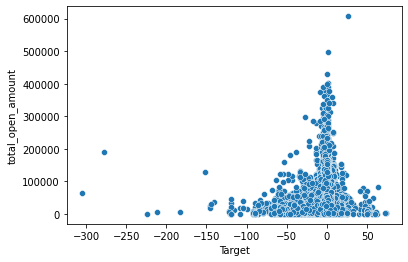

In [54]:
sns.scatterplot(data = A, x="Target", y="total_open_amount")

Infernce from above the graph -

1. The wider and more round the association is, the more the variables are uncorrelated. 
2. An observation that appears detached from the bulk of observations may be an outlier requiring to be dropped because outliers can badly affect the correlation coefficient, whereas other correlation coefficients are more robust to them. 

# Feature Engineering 

### Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
# Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. 
# Machine learning algorithms can then decide in a better way on how those labels must be operated.

In [57]:
X_train['cust_payment_terms'].value_counts()

NAA8    11153
NAH4     7489
CA10     2152
NAC6      973
NAM4      732
        ...  
NAV9        1
NAUW        1
NATK        1
NATJ        1
NATL        1
Name: cust_payment_terms, Length: 64, dtype: int64

In [58]:
# From the above value count of column 'cust_payment_terms' we can infer that number of counts FOR some particular elements are more whereas for some it's very less or 1.
# So we grouped all the elements having less count under - 'OTHER'

X_train['cust_payment_terms'] = np.where(X_train['cust_payment_terms'].isin(['NAA8','NAH4','CA10','NAC6','NAM4']),X_train['cust_payment_terms'],'OTHER')
X_val['cust_payment_terms'] = np.where(X_val['cust_payment_terms'].isin(['NAA8','NAH4','CA10','NAC6','NAM4']),X_val['cust_payment_terms'],'OTHER')
X_test['cust_payment_terms'] = np.where(X_test['cust_payment_terms'].isin(['NAA8','NAH4','CA10','NAC6','NAM4']),X_test['cust_payment_terms'],'OTHER')

In [59]:
X_train['cust_payment_terms'].value_counts()

NAA8     11153
NAH4      7489
OTHER     5497
CA10      2152
NAC6       973
NAM4       732
Name: cust_payment_terms, dtype: int64

In [60]:
X_train['business_code'].value_counts()

U001    25309
CA02     2226
U013      357
U002       99
U005        4
U007        1
Name: business_code, dtype: int64

In [61]:
# From the above value count of column 'business_code' we can infer that number of counts FOR some particular elements are more whereas for some it's very less or 1.
# So we grouped all the elements having less count under - 'OTHER'

X_train['business_code'] = np.where(X_train['business_code'].isin(['U001','CA02']),X_train['business_code'],'OTHER')
X_val['business_code'] = np.where(X_val['business_code'].isin(['U001','CA02']),X_val['business_code'],'OTHER')
X_test['business_code'] = np.where(X_test['business_code'].isin(['U001','CA02']),X_test['business_code'],'OTHER')

In [62]:
X_train['business_code'].value_counts()

U001     25309
CA02      2226
OTHER      461
Name: business_code, dtype: int64

In [63]:
X_train['invoice_currency'].value_counts()

USD    25769
CAD     2227
Name: invoice_currency, dtype: int64

In [64]:
X_val['business_code'].value_counts()

U001     5381
CA02      496
OTHER     122
Name: business_code, dtype: int64

In [65]:
# Label encode business_code

business_code_en = LabelEncoder()

business_code_en.fit(X_train['business_code'])
X_train['business_code'] = business_code_en.transform(X_train['business_code'])

business_code_en.fit(X_val['business_code'])
X_val['business_code'] = business_code_en.transform(X_val['business_code'])

business_code_en.fit(X_test['business_code'])
X_test['business_code'] = business_code_en.transform(X_test['business_code'])


In [66]:
# Label encode cust_number

cust_number_en = LabelEncoder()

cust_number_en.fit(X_train['cust_number'])
X_train['cust_number'] = cust_number_en.transform(X_train['cust_number'])

cust_number_en.fit(X_val['cust_number'])
X_val['cust_number'] = cust_number_en.transform(X_val['cust_number'])

cust_number_en.fit(X_test['cust_number'])
X_test['cust_number'] = cust_number_en.transform(X_test['cust_number'])


In [67]:
# Label encode invoice_currency

invoice_currency_en = LabelEncoder()

invoice_currency_en.fit(X_train['invoice_currency'])
X_train['invoice_currency'] = invoice_currency_en.transform(X_train['invoice_currency'])

invoice_currency_en.fit(X_val['invoice_currency'])
X_val['invoice_currency'] = invoice_currency_en.transform(X_val['invoice_currency'])

invoice_currency_en.fit(X_test['invoice_currency'])
X_test['invoice_currency'] = invoice_currency_en.transform(X_test['invoice_currency'])


In [68]:
# Label encode cust_payment_terms

cust_payment_terms_en = LabelEncoder()

cust_payment_terms_en.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms'] = cust_payment_terms_en.transform(X_train['cust_payment_terms'])

cust_payment_terms_en.fit(X_val['cust_payment_terms'])
X_val['cust_payment_terms'] = cust_payment_terms_en.transform(X_val['cust_payment_terms'])

cust_payment_terms_en.fit(X_test['cust_payment_terms'])
X_test['cust_payment_terms'] = cust_payment_terms_en.transform(X_test['cust_payment_terms'])


In [69]:
# Extracting day_of_week, month, year from document_create_date

X_train['day_of_week'] = X_train['document_create_date'].dt.weekday
X_train['month'] = X_train['document_create_date'].dt.month
X_train['year'] = X_train['document_create_date'].dt.year

X_val['day_of_week'] = X_val['document_create_date'].dt.weekday
X_val['month'] = X_val['document_create_date'].dt.month
X_val['year'] = X_val['document_create_date'].dt.year

X_test['day_of_week'] = X_test['document_create_date'].dt.weekday
X_test['month'] = X_test['document_create_date'].dt.month
X_test['year'] = X_test['document_create_date'].dt.year


In [70]:
X_train.sort_values(by=['clear_date'])

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,day_of_week,month,year
18605,2,733,WAL-MAR associates,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,1,RV,1.0,1972.01,2018-12-30,3,0,5,12,2018
2693,2,733,WAL-MAR us,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,1,RV,1.0,17567.05,2018-12-30,3,0,5,12,2018
27405,2,733,WAL-MAR associates,2019-01-09,2019.0,1.928542e+09,2018-12-30,2018-12-29,2019-01-14,1,RV,1.0,4890.99,2018-12-30,3,0,5,12,2018
15709,2,733,WAL-MAR corporation,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,1,RV,1.0,21950.77,2018-12-30,3,0,6,12,2018
4497,2,733,WAL-MAR in,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,1,RV,1.0,21171.35,2018-12-30,3,0,5,12,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33093,2,899,MASTER in,2020-05-18,2020.0,1.930490e+09,2020-02-06,2020-02-06,2020-06-05,1,RV,1.0,2365.00,2020-02-06,5,0,3,2,2020
13716,2,899,MASTER systems,2020-05-18,2020.0,1.930508e+09,2020-02-10,2020-02-10,2020-06-09,1,RV,1.0,5400.00,2020-02-10,5,0,0,2,2020
30327,2,645,BJ'S trust,2020-05-21,2020.0,1.930386e+09,2020-01-08,2020-01-10,2020-01-23,1,RV,1.0,329.26,2020-01-08,1,0,4,1,2020
34201,2,645,BJ'S systems,2020-05-21,2020.0,1.930383e+09,2020-01-08,2020-01-09,2020-01-23,1,RV,1.0,305.68,2020-01-08,1,0,3,1,2020


In [71]:
# Dropping the columns that won't help in predictions.
# Also during EDA we have mentioned few columns to be dropped that we are dropping now.

X_train.drop(['name_customer','document type','posting_id','buisness_year','doc_id','posting_date','document_create_date','due_in_date','baseline_create_date','clear_date'],axis=1,inplace=True)
X_val.drop(['name_customer','document type','posting_id','buisness_year','doc_id','posting_date','document_create_date','due_in_date','baseline_create_date','clear_date'],axis=1,inplace=True)
X_test.drop(['name_customer','document type','posting_id','buisness_year','doc_id','posting_date','document_create_date','due_in_date','baseline_create_date','clear_date'],axis=1,inplace=True)

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27996 entries, 0 to 35040
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   business_code       27996 non-null  int32  
 1   cust_number         27996 non-null  int32  
 2   invoice_currency    27996 non-null  int32  
 3   total_open_amount   27996 non-null  float64
 4   cust_payment_terms  27996 non-null  int32  
 5   isOpen              27996 non-null  int64  
 6   day_of_week         27996 non-null  int64  
 7   month               27996 non-null  int64  
 8   year                27996 non-null  int64  
dtypes: float64(1), int32(4), int64(4)
memory usage: 1.7 MB


In [73]:
# Converting from float to int in 'total_open_amount' column

X_train['total_open_amount'] = X_train['total_open_amount'].astype(int)
X_val['total_open_amount'] = X_val['total_open_amount'].astype(int)
X_test['total_open_amount'] = X_test['total_open_amount'].astype(int)

In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27996 entries, 0 to 35040
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   business_code       27996 non-null  int32
 1   cust_number         27996 non-null  int32
 2   invoice_currency    27996 non-null  int32
 3   total_open_amount   27996 non-null  int32
 4   cust_payment_terms  27996 non-null  int32
 5   isOpen              27996 non-null  int64
 6   day_of_week         27996 non-null  int64
 7   month               27996 non-null  int64
 8   year                27996 non-null  int64
dtypes: int32(5), int64(4)
memory usage: 1.6 MB


# Feature Selection

### Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

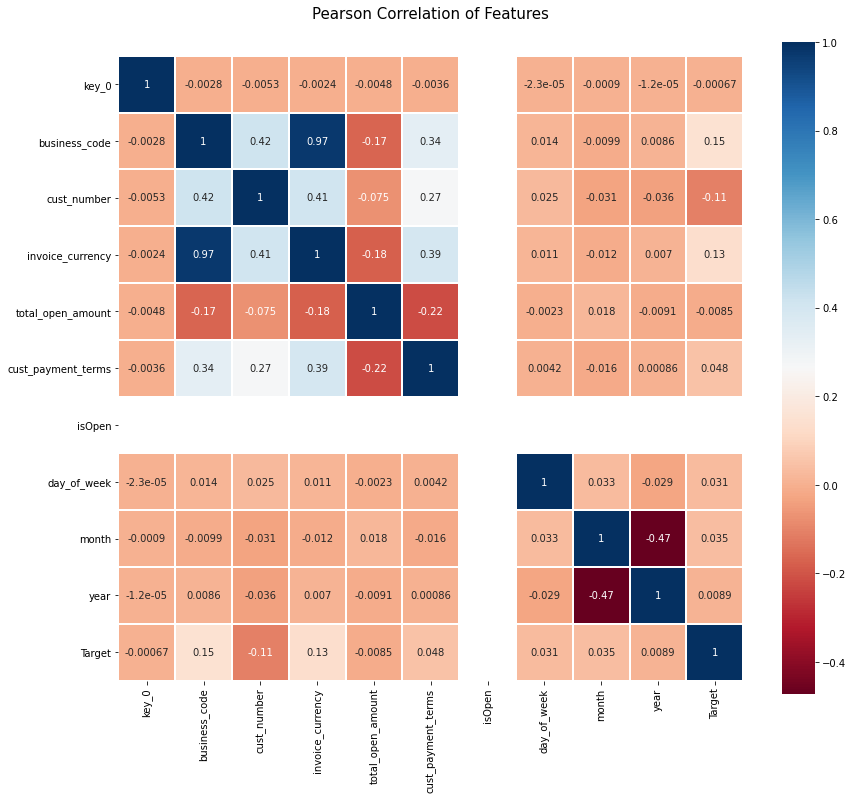

In [75]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [76]:
# Here we can see isOpen, day_of_week, month and year is a constant column hence should be dropped

In [77]:
X_train.drop(['isOpen','day_of_week','month','year'],axis=1,inplace=True)
X_val.drop(['isOpen','day_of_week','month','year'],axis=1,inplace=True)
X_test.drop(['isOpen','day_of_week','month','year'],axis=1,inplace=True)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

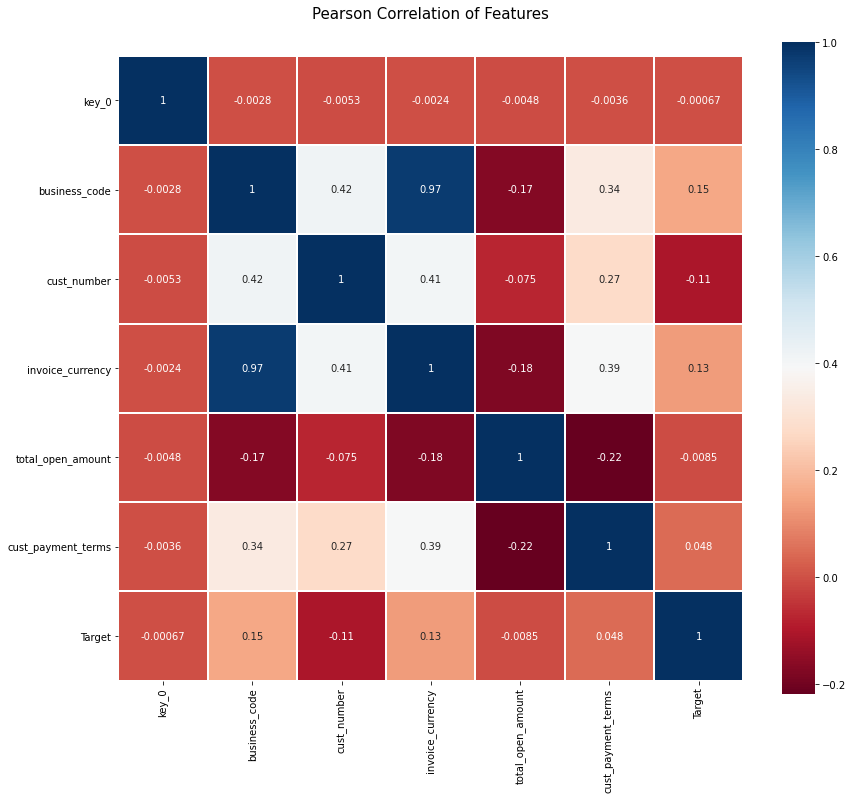

In [78]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [79]:
# Since all the columns have been converted to int/ float, we can use variance threshold
# The variance threshold is a simple baseline approach to feature selection. 
# It removes all features which variance doesn't meet some threshold

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [80]:
sel.variances_

array([3.03715559e-01, 4.82147005e+04, 7.32193405e-02, 1.53988054e+09,
       2.71782905e+00])

# Modelling

### Creating a base model

In [81]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [82]:
# Linear Regression is a machine learning algorithm based on supervised learning. 
# Linear regression performs the task to predict a dependent variable value (say y) based on a given independent variable (say x)

In [83]:
y_predict = base_model.predict(X_val)

In [84]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

10.381301870855113

In [85]:
# The mean squared error (MSE) tells us how close a regression line is to a set of points. 
# It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. 
# The squaring is necessary to remove any negative signs.

# Tree based model

### Decision Tree is one of the most commonly used, practical approaches for supervised learning. It can be used to solve both Regression and Classification tasks with the latter being put more into practical application. Through multiple iterations, the Tree is able to predict a proper value for the data point.

In [86]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=7)

In [87]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=0)

In [88]:
y_predict2 = regressor.predict(X_val)

In [89]:
mean_squared_error(y_val, y_predict2, squared=False)

11.053602838512967

In [90]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

12.254066456480752

In [91]:
# Once we have good enough result to do a prediction on the X_test set, we have to confirm that the model is not getting overfitted

In [92]:
regressor.score(X_train,y_train)

0.4299739023735272

In [93]:
# In main_test set we can see that the Target column has all values NaN.

In [94]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
4,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930686e+09,2020-03-24,2020-03-22,2020-04-08,USD,RV,1.0,47959.38,2020-03-24,NAH4,1.930686e+09,1,NaN
20,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930885e+09,2020-05-11,2020-05-10,2020-05-26,USD,RV,1.0,69002.51,2020-05-11,NAH4,1.930885e+09,1,NaN
24,CA02,140106181,THE associates,NaT,2020.0,2.960618e+09,2020-03-05,2020-03-05,2020-03-20,CAD,RV,1.0,1280.10,2020-03-10,CA10,2.960618e+09,1,NaN
27,U001,0200794332,COST co,NaT,2020.0,1.930606e+09,2020-03-09,2020-03-05,2020-03-24,USD,RV,1.0,25840.34,2020-03-09,NAAX,1.930606e+09,1,NaN
28,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930795e+09,2020-04-16,2020-04-16,2020-05-01,USD,RV,1.0,40805.06,2020-04-16,NAH4,1.930795e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49962,U001,200770567,LABAT in,NaT,2020.0,1.930878e+09,2020-05-11,2020-05-08,2020-05-26,USD,RV,1.0,54356.94,2020-05-11,NAA8,1.930878e+09,1,NaN
49990,U001,0200455322,PEA corp,NaT,2020.0,1.930657e+09,2020-03-16,2020-03-16,2020-04-15,USD,RV,1.0,45893.59,2020-03-16,NAD5,1.930657e+09,1,NaN
49994,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930779e+09,2020-04-12,2020-04-11,2020-04-27,USD,RV,1.0,4584.85,2020-04-12,NAH4,1.930779e+09,1,NaN
49996,U001,0200772670,ASSOCIAT llc,NaT,2020.0,1.930694e+09,2020-03-24,2020-03-25,2020-04-08,USD,RV,1.0,31572.48,2020-03-24,NAU5,1.930694e+09,1,NaN


### We have to bring the main_test in same format as that of the X_train

### 1. Doing same preprocessing steps
### 2. Doing same feature engg
### 3. Doing same feature selection
### 4. Fed to model and predict

### Note:- We will not do EDA because EDA is done only on train set.

In [95]:
main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 4 to 49998
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         10000 non-null  object        
 1   cust_number           10000 non-null  object        
 2   name_customer         10000 non-null  object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         10000 non-null  float64       
 5   doc_id                10000 non-null  float64       
 6   posting_date          10000 non-null  object        
 7   document_create_date  10000 non-null  datetime64[ns]
 8   due_in_date           10000 non-null  datetime64[ns]
 9   invoice_currency      10000 non-null  object        
 10  document type         10000 non-null  object        
 11  posting_id            10000 non-null  float64       
 12  total_open_amount     10000 non-null  float64       
 13  baseline_create_

In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27996 entries, 0 to 35040
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   business_code       27996 non-null  int32
 1   cust_number         27996 non-null  int32
 2   invoice_currency    27996 non-null  int32
 3   total_open_amount   27996 non-null  int32
 4   cust_payment_terms  27996 non-null  int32
dtypes: int32(5)
memory usage: 765.5 KB


In [97]:
X_train

,business_code,cust_number,invoice_currency,total_open_amount,cust_payment_terms
0,2,611,1,4303,5
1,2,717,1,13146,2
2,2,733,1,551,3
3,0,371,0,843,0
5,2,733,1,3702,3
...,...,...,...,...,...
35036,2,733,1,11571,3
35037,2,748,1,43632,1
35038,2,383,1,1658,4
35039,2,660,1,24978,1


#### Dropping 'Target' column since we need to predict that and it's null values.

In [98]:
X_main_test = main_test.drop(['Target'],axis=1)
X_main_test

# Drop 'Target' column from main_test itself
main_test.drop(['Target'], inplace =True,axis=1)

In [99]:
X_main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
4,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930686e+09,2020-03-24,2020-03-22,2020-04-08,USD,RV,1.0,47959.38,2020-03-24,NAH4,1.930686e+09,1
20,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930885e+09,2020-05-11,2020-05-10,2020-05-26,USD,RV,1.0,69002.51,2020-05-11,NAH4,1.930885e+09,1
24,CA02,140106181,THE associates,NaT,2020.0,2.960618e+09,2020-03-05,2020-03-05,2020-03-20,CAD,RV,1.0,1280.10,2020-03-10,CA10,2.960618e+09,1
27,U001,0200794332,COST co,NaT,2020.0,1.930606e+09,2020-03-09,2020-03-05,2020-03-24,USD,RV,1.0,25840.34,2020-03-09,NAAX,1.930606e+09,1
28,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930795e+09,2020-04-16,2020-04-16,2020-05-01,USD,RV,1.0,40805.06,2020-04-16,NAH4,1.930795e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49962,U001,200770567,LABAT in,NaT,2020.0,1.930878e+09,2020-05-11,2020-05-08,2020-05-26,USD,RV,1.0,54356.94,2020-05-11,NAA8,1.930878e+09,1
49990,U001,0200455322,PEA corp,NaT,2020.0,1.930657e+09,2020-03-16,2020-03-16,2020-04-15,USD,RV,1.0,45893.59,2020-03-16,NAD5,1.930657e+09,1
49994,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930779e+09,2020-04-12,2020-04-11,2020-04-27,USD,RV,1.0,4584.85,2020-04-12,NAH4,1.930779e+09,1
49996,U001,0200772670,ASSOCIAT llc,NaT,2020.0,1.930694e+09,2020-03-24,2020-03-25,2020-04-08,USD,RV,1.0,31572.48,2020-03-24,NAU5,1.930694e+09,1


In [100]:
# Dropping the columns that won't help in predictions.

X_main_test.drop(['name_customer','clear_date','buisness_year','doc_id','posting_date','document_create_date','due_in_date','document type','posting_id','baseline_create_date','invoice_id','isOpen'],axis=1,inplace=True)

In [101]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 4 to 49998
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   business_code       10000 non-null  object 
 1   cust_number         10000 non-null  object 
 2   invoice_currency    10000 non-null  object 
 3   total_open_amount   10000 non-null  float64
 4   cust_payment_terms  10000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 468.8+ KB


In [102]:
# Converting from float to int in 'total_open_amount' column

X_main_test['total_open_amount'] = X_main_test['total_open_amount'].astype(int)

In [103]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 4 to 49998
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   business_code       10000 non-null  object
 1   cust_number         10000 non-null  object
 2   invoice_currency    10000 non-null  object
 3   total_open_amount   10000 non-null  int32 
 4   cust_payment_terms  10000 non-null  object
dtypes: int32(1), object(4)
memory usage: 429.7+ KB


In [104]:
X_main_test['cust_payment_terms'].value_counts()

NAA8    4049
NAH4    3042
CA10     739
NAC6     421
NAGD     289
NAM4     266
NAAX     237
NAU5     203
NAM2     120
NAD1     102
NAG2      76
NA32      76
NAX2      71
NAM1      55
NA10      53
NAVE      41
NAD5      39
NAWP      23
NAAW      21
NAVF      15
NABG       6
NA38       6
NACH       6
CAB1       4
NAVQ       4
NAUZ       4
NA84       4
NACB       4
CA30       3
NAB1       3
NA3F       3
NA3B       2
NAUP       2
NAM3       2
NACG       2
NAVD       2
C106       1
BR12       1
B052       1
CAX2       1
NAUY       1
Name: cust_payment_terms, dtype: int64

In [105]:
# From the above value count of column 'cust_payment_terms' we can infer that number of counts FOR some particular elements are more whereas for some it's very less or 1.
# So we grouped all the elements having less count under - 'OTHER'

X_main_test['cust_payment_terms'] = np.where(X_main_test['cust_payment_terms'].isin(['NAA8','NAH4','CA10','NAC6','NAM4']),X_main_test['cust_payment_terms'],'OTHER')

In [106]:
X_main_test['cust_payment_terms'].value_counts()

NAA8     4049
NAH4     3042
OTHER    1483
CA10      739
NAC6      421
NAM4      266
Name: cust_payment_terms, dtype: int64

In [107]:
X_main_test['business_code'].value_counts()

U001    9154
CA02     753
U013      66
U002      22
U005       5
Name: business_code, dtype: int64

In [108]:
# From the above value count of column 'business_code' we can infer that number of counts FOR some particular elements are more whereas for some it's very less or 1.
# So we grouped all the elements having less count under - 'OTHER'

X_main_test['business_code'] = np.where(X_main_test['business_code'].isin(['U001','CA02']),X_main_test['business_code'],'OTHER')

In [109]:
X_main_test['business_code'].value_counts()

U001     9154
CA02      753
OTHER      93
Name: business_code, dtype: int64

In [110]:
# Label encode cust_number

cust_number_en = LabelEncoder()

cust_number_en.fit(X_main_test['cust_number'])
X_main_test['cust_number'] = cust_number_en.transform(X_main_test['cust_number'])

In [111]:
# Label encode invoice_currency

invoice_currency_en = LabelEncoder()

invoice_currency_en.fit(X_main_test['invoice_currency'])
X_main_test['invoice_currency'] = invoice_currency_en.transform(X_main_test['invoice_currency'])

In [112]:
# Label encode cust_payment

cust_payment_terms_en = LabelEncoder()

cust_payment_terms_en.fit(X_main_test['cust_payment_terms'])
X_main_test['cust_payment_terms'] = cust_payment_terms_en.transform(X_main_test['cust_payment_terms'])

In [113]:
# Label encode business_code

business_code_en = LabelEncoder()

business_code_en.fit(X_main_test['business_code'])
X_main_test['business_code'] = business_code_en.transform(X_main_test['business_code'])

In [114]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 4 to 49998
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   business_code       10000 non-null  int32
 1   cust_number         10000 non-null  int32
 2   invoice_currency    10000 non-null  int32
 3   total_open_amount   10000 non-null  int32
 4   cust_payment_terms  10000 non-null  int32
dtypes: int32(5)
memory usage: 273.4 KB


# Predicting the 'Target' column

In [115]:
final_result = regressor.predict(X_main_test)

In [116]:
final_result = pd.Series(final_result,name='Target')

In [117]:
# Resetting the index of main_test so that we can merge target series with it

main_test.reset_index(drop=True,inplace=True)

In [118]:
Final = main_test.merge(final_result , on = X_main_test.index )

In [119]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
0,4,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930686e+09,2020-03-24,2020-03-22,2020-04-08,USD,RV,1.0,47959.38,2020-03-24,NAH4,1.930686e+09,1,3.135894
1,20,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930885e+09,2020-05-11,2020-05-10,2020-05-26,USD,RV,1.0,69002.51,2020-05-11,NAH4,1.930885e+09,1,3.135894
2,24,CA02,140106181,THE associates,NaT,2020.0,2.960618e+09,2020-03-05,2020-03-05,2020-03-20,CAD,RV,1.0,1280.10,2020-03-10,CA10,2.960618e+09,1,-6.962756
3,27,U001,0200794332,COST co,NaT,2020.0,1.930606e+09,2020-03-09,2020-03-05,2020-03-24,USD,RV,1.0,25840.34,2020-03-09,NAAX,1.930606e+09,1,3.135894
4,28,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930795e+09,2020-04-16,2020-04-16,2020-05-01,USD,RV,1.0,40805.06,2020-04-16,NAH4,1.930795e+09,1,3.135894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49962,U001,200770567,LABAT in,NaT,2020.0,1.930878e+09,2020-05-11,2020-05-08,2020-05-26,USD,RV,1.0,54356.94,2020-05-11,NAA8,1.930878e+09,1,-0.801434
9996,49990,U001,0200455322,PEA corp,NaT,2020.0,1.930657e+09,2020-03-16,2020-03-16,2020-04-15,USD,RV,1.0,45893.59,2020-03-16,NAD5,1.930657e+09,1,3.135894
9997,49994,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930779e+09,2020-04-12,2020-04-11,2020-04-27,USD,RV,1.0,4584.85,2020-04-12,NAH4,1.930779e+09,1,3.135894
9998,49996,U001,0200772670,ASSOCIAT llc,NaT,2020.0,1.930694e+09,2020-03-24,2020-03-25,2020-04-08,USD,RV,1.0,31572.48,2020-03-24,NAU5,1.930694e+09,1,3.135894


In [120]:
Final['Target']

0       3.135894
1       3.135894
2      -6.962756
3       3.135894
4       3.135894
          ...   
9995   -0.801434
9996    3.135894
9997    3.135894
9998    3.135894
9999   -0.156695
Name: Target, Length: 10000, dtype: float64

In [121]:
# Converting from float to int in 'Target' column

Final['Target'] = Final['Target'].astype(int)

In [122]:
Final['Target']

0       3
1       3
2      -6
3       3
4       3
       ..
9995    0
9996    3
9997    3
9998    3
9999    0
Name: Target, Length: 10000, dtype: int32

### 'Target' column successfully predicted in terms of number of days.
### This 'Target' column is the delay days. 

# Now we have to predict the clear_date by adding the 'Target' (delay) with 'due_in_date'

In [123]:
# Dropping the clear_date column because we will update a new column with the updated predicted clear dates in it.

Final.drop(['clear_date'],axis=1,inplace=True)

In [124]:
# Making a new column name 'Predicted_Clear_Date'
# 'Predicted_Clear_Date' = 'due_in_date' + 'Target'

Final['Predicted_Clear_Date']=Final['due_in_date'] + Final['Target'].map(dt.timedelta)

In [125]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target,Predicted_Clear_Date
0,4,U001,0200769623,WAL-MAR corp,2020.0,1.930686e+09,2020-03-24,2020-03-22,2020-04-08,USD,RV,1.0,47959.38,2020-03-24,NAH4,1.930686e+09,1,3,2020-04-11
1,20,U001,0200769623,WAL-MAR llc,2020.0,1.930885e+09,2020-05-11,2020-05-10,2020-05-26,USD,RV,1.0,69002.51,2020-05-11,NAH4,1.930885e+09,1,3,2020-05-29
2,24,CA02,140106181,THE associates,2020.0,2.960618e+09,2020-03-05,2020-03-05,2020-03-20,CAD,RV,1.0,1280.10,2020-03-10,CA10,2.960618e+09,1,-6,2020-03-14
3,27,U001,0200794332,COST co,2020.0,1.930606e+09,2020-03-09,2020-03-05,2020-03-24,USD,RV,1.0,25840.34,2020-03-09,NAAX,1.930606e+09,1,3,2020-03-27
4,28,U001,0200769623,WAL-MAR llc,2020.0,1.930795e+09,2020-04-16,2020-04-16,2020-05-01,USD,RV,1.0,40805.06,2020-04-16,NAH4,1.930795e+09,1,3,2020-05-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49962,U001,200770567,LABAT in,2020.0,1.930878e+09,2020-05-11,2020-05-08,2020-05-26,USD,RV,1.0,54356.94,2020-05-11,NAA8,1.930878e+09,1,0,2020-05-26
9996,49990,U001,0200455322,PEA corp,2020.0,1.930657e+09,2020-03-16,2020-03-16,2020-04-15,USD,RV,1.0,45893.59,2020-03-16,NAD5,1.930657e+09,1,3,2020-04-18
9997,49994,U001,0200769623,WAL-MAR systems,2020.0,1.930779e+09,2020-04-12,2020-04-11,2020-04-27,USD,RV,1.0,4584.85,2020-04-12,NAH4,1.930779e+09,1,3,2020-04-30
9998,49996,U001,0200772670,ASSOCIAT llc,2020.0,1.930694e+09,2020-03-24,2020-03-25,2020-04-08,USD,RV,1.0,31572.48,2020-03-24,NAU5,1.930694e+09,1,3,2020-04-11


In [126]:
Final[['due_in_date','Target','Predicted_Clear_Date']]

,due_in_date,Target,Predicted_Clear_Date
0,2020-04-08,3,2020-04-11
1,2020-05-26,3,2020-05-29
2,2020-03-20,-6,2020-03-14
3,2020-03-24,3,2020-03-27
4,2020-05-01,3,2020-05-04
...,...,...,...
9995,2020-05-26,0,2020-05-26
9996,2020-04-15,3,2020-04-18
9997,2020-04-27,3,2020-04-30
9998,2020-04-08,3,2020-04-11


# The clear_date has been successfully predicted and updated in the 'Predicted_Clear_Date' column